In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./datasets/',
                                       train=True,
                                       download=True,
                                       transform=transforms.ToTensor())

Files already downloaded and verified


In [4]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./datasets/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [5]:
trainloaded = torch.utils.data.DataLoader(trainset,
                                         batch_size=8,
                                         shuffle=True,
                                         num_workers=2)

In [6]:
testset = torchvision.datasets.CIFAR10(root='./datasets/',
                                       train=False,
                                       download=True,
                                       transform=transforms.ToTensor())

Files already downloaded and verified


In [7]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ./datasets/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [8]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=8,
                                         shuffle=False,
                                         num_workers=2)

In [9]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog',
         'horse', 'ship', 'truck')

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
images_batch, labels_batch = iter(trainloaded).next()

In [12]:
images_batch.shape

torch.Size([8, 3, 32, 32])

In [13]:
img = torchvision.utils.make_grid(images_batch)

In [14]:
img.shape

torch.Size([3, 36, 274])

In [15]:
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

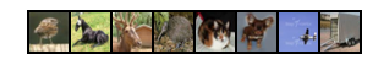

In [16]:
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [17]:
import torch.nn as nn

In [18]:
in_size = 3
hid1_size =16
hid2_size = 32
out_size = len(labels)
k_conv_size = 5

In [30]:
class ConNet(nn.Module):
    
    def __init__(self):
        super(ConNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size,out_size)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [31]:
model = ConNet()

In [32]:
learning_rate= 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                            lr=learning_rate)

In [33]:
num_epochs = 5
total_step = len(trainloaded)

In [34]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloaded):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print('Epoch [{}/{}],Step [{}/{}],Loss: {:.4f}'
                 .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5],Step [2000/6250],Loss: 1.3160
Epoch [1/5],Step [4000/6250],Loss: 1.6717
Epoch [1/5],Step [6000/6250],Loss: 0.6939
Epoch [2/5],Step [2000/6250],Loss: 1.2846
Epoch [2/5],Step [4000/6250],Loss: 0.7971
Epoch [2/5],Step [6000/6250],Loss: 1.2565
Epoch [3/5],Step [2000/6250],Loss: 1.1080
Epoch [3/5],Step [4000/6250],Loss: 1.3362
Epoch [3/5],Step [6000/6250],Loss: 1.1973
Epoch [4/5],Step [2000/6250],Loss: 0.7065
Epoch [4/5],Step [4000/6250],Loss: 0.8404
Epoch [4/5],Step [6000/6250],Loss: 0.2659
Epoch [5/5],Step [2000/6250],Loss: 1.3018
Epoch [5/5],Step [4000/6250],Loss: 1.0567
Epoch [5/5],Step [6000/6250],Loss: 0.8939


In [36]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in testloader:
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the model on the 10000 test images: {}%'\
         .format(100*correct/total))
        

Accuracy of the model on the 10000 test images: 67.2%
